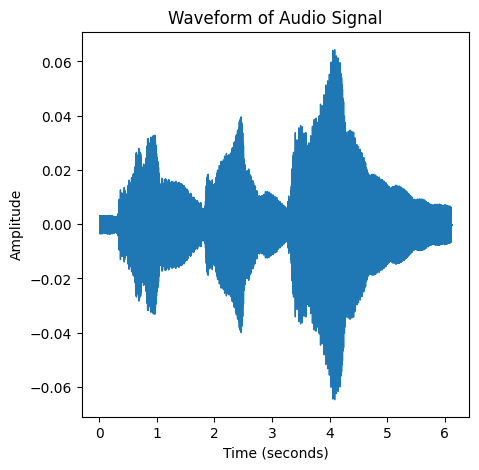

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
# Load an audio file
audio_file = "./download1.wav"
custom_sample_rate=16000
audio_data, sample_rate = librosa.load(audio_file,sr=custom_sample_rate)
# Plot the waveform in the time domain
plt.figure(figsize=(5,5))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## MFCCs Features Extraction

(40, 613)


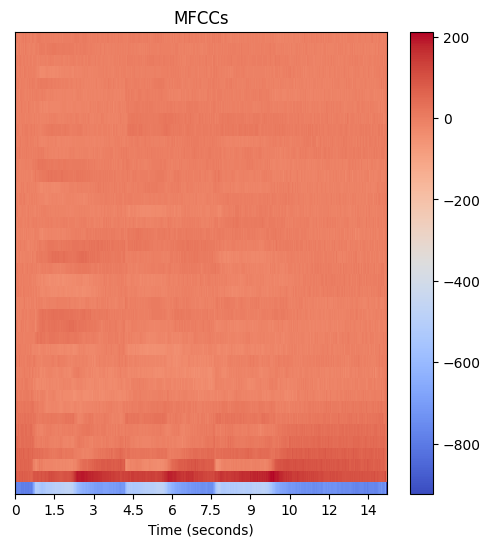

In [2]:
#extracting the mfccs features with following attributes
#hop_lenght=25ms,win_length=25ms hop_length=10ms,fs=16khz,fft_size=1024
n_mfcc = 40
n_fft = 1024  # setting the FFT size to 1024
hop_length = 10*16 # 25ms*16khz samples has been taken
win_length = 25*16 #25ms*16khz samples has been taken for window length
window = 'hann' #hann window used
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc,
                             n_fft=n_fft, hop_length=hop_length,
                             win_length=win_length, window=window)
print(mfccs.shape)
plt.figure(figsize=(6, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (seconds)')
plt.show()

### Chroma Features Extraction
y: This parameter is the input audio signal, which can be a 1-dimensional numpy array.

sr: This parameter is the sampling rate of the input signal, in Hz.

tuning: This parameter is the reference tuning frequency used for the chroma filter bank, in Hz. If None, the tuning is automatically estimated.

norm: This parameter is the normalization scheme to use for the chroma filter bank. If None, no normalization is applied. If 'l1', the L1-norm is applied. If 'l2', the L2-norm is applied.

hop_length: This parameter is the number of samples between the start of each frame in the audio signal when calculating the chroma features. This is equivalent to the hop size between adjacent frames, as I mentioned earlier.

n_fft: This parameter is the number of points to use for the FFT when calculating the spectrogram. Larger values of n_fft will provide more frequency resolution, but will also increase the computation time.

win_length: This parameter is the length of the window used for the STFT when calculating the spectrogram. Larger values of win_length will provide better frequency resolution, but will also increase the computation time.

window: This parameter is the type of window to use for the STFT. The default value is 'hann', which uses a Hann window. Other options include 'hamming', 'blackman', and 'bartlett'.

center: This parameter specifies whether to center the STFT frames. If True, the STFT frames are centered at the midpoint of the window. If False, the STFT frames are aligned to the beginning of the window.

pad_mode: This parameter specifies the padding mode to use when the input signal is shorter than win_length. The default value is 'reflect', which pads the signal by reflecting the signal at the edge.

n_chroma: This parameter is the number of chroma bands to use. The default value is 12, which is equivalent to the number of semitones in an octave.

By adjusting these parameters, you can customize the behavior of the librosa.feature.chroma_stft function to best suit your needs.

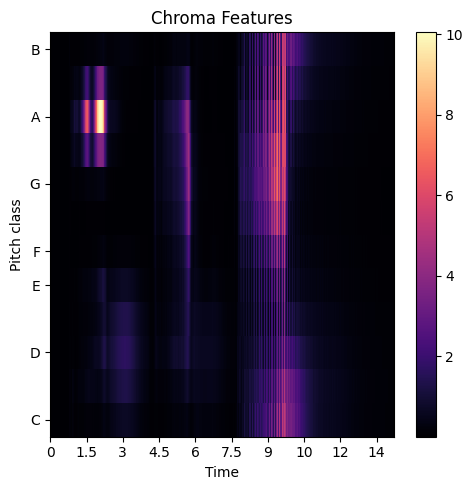

(12, 613)


In [3]:
n_chroma=12 #number of chroma bands or features to extarct
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate, tuning=None, norm=None, hop_length=hop_length, n_fft=n_fft, win_length=win_length, window='hann', center=True, pad_mode='reflect', n_chroma=n_chroma)
plt.figure(figsize=(5, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Features')
plt.tight_layout()
plt.show()
print(chroma.shape)

## Mel Spectrogram
We apply a logarithmic transformation to the mel spectrogram (mel_spec) to obtain the log-mel spectrogram (log_mel_spec) because the human auditory system perceives loudness on a logarithmic scale.

The spectrogram of an audio signal is typically represented on a linear scale, which means that the distance between any two points on the plot represents the same absolute difference in energy. However, human perception of sound is much more sensitive to changes in loudness at low levels than at high levels. For example, a doubling of loudness from 40 dB to 80 dB is perceived as a much smaller change in loudness than a doubling of loudness from 0 dB to 40 dB.

To account for this nonlinearity in perception, we use a logarithmic scaling to compress the dynamic range of the mel spectrogram. This makes the smaller differences in energy levels between different frequency bands more apparent and can improve the performance of machine learning algorithms that use the log-mel spectrogram as a feature.

In summary, applying a logarithmic transformation to the mel spectrogram helps to capture the perception of loudness in a way that is more consistent with human hearing.
We need sample_rate and hop_length parameters for plotting the spectrogram because they are used to determine the horizontal and vertical scaling of the plot.
The sample_rate parameter is necessary to properly display the time axis of the spectrogram. It specifies the number of samples per second in the audio signal, which is needed to convert the frame index of each spectrogram column into time values that can be displayed on the plot.
The hop_length parameter specifies the number of samples between the start of each frame in the spectrogram. This parameter is used to determine the horizontal resolution of the display, i.e., the number of pixels used to represent each time frame in the plot. A smaller hop length results in a higher horizontal resolution, but also increases the number of columns in the spectrogram, which can make the plot harder to interpret.

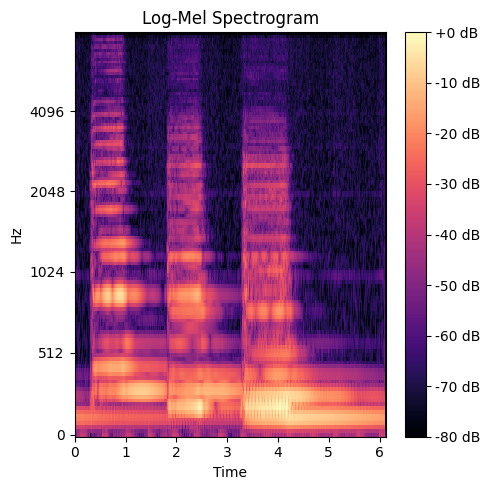

(128, 613)


In [5]:
n_mels=128
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window='hann', center=True, pad_mode='reflect', n_mels=n_mels)
#for better visualisation as per humans
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(5, 5))
#for vertical and horizonatl sacling sr and hop_legnth is given
librosa.display.specshow(log_mel_spec, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.show()
print(log_mel_spec.shape)

## Spectral Contrast

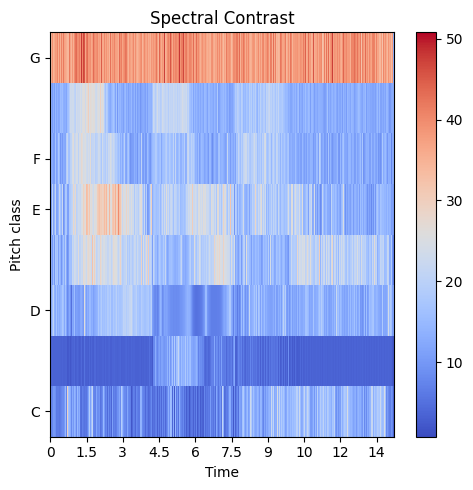

In [10]:
n_bands=7 #we are extracting the 7 features out of the spectral contrast
fmin=100 #we set the min frequency here to 100
#approipriate value should be chosen
spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate, n_fft=n_fft,
                                                      hop_length=hop_length, win_length=win_length,
                                                      n_bands=n_bands, fmin=fmin)
plt.figure(figsize=(5, 5))
librosa.display.specshow(spectral_contrast, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Spectral Contrast')
plt.tight_layout()
plt.show()

### Tonnetz
chroma_cqt is a chromagram representation that uses the constant-Q transform (CQT) instead of the STFT used in the standard chromagram representation. It is computed in a similar manner to chroma_stft, but the CQT is used instead of STFT. The output of chroma_cqt is also a matrix of shape (n_chroma, n_frames), where n_chroma is the number of chroma bins and n_frames is the number of frames or time steps in the audio signal.

Here, we first extract the chroma features using librosa.feature.chroma_cqt() function, which returns a matrix of size (n_chroma, n_frames). We then pass this matrix to the librosa.feature.tonnetz() function to extract the tonnetz features.

If we want to give custom paramters with such as hop_length we need to give buid the chromogram first then we build the tonnetz features from the chromogram

In [14]:
bins_per_ocatve=12
chroma_cqt = librosa.feature.chroma_cqt(y=audio_data, sr=sample_rate, hop_length=hop_length, n_chroma=n_chroma, bins_per_octave=12)
tonnetz = librosa.feature.tonnetz(chroma=chroma_cqt)

Tonnetz features are 6-dimensional vectors representing the pitch class content of a given audio signal. Hence, we cannot directly visualize the tonnetz features as we do for spectrograms, chromograms, or MFCCs. However, we can visualize the tonnetz features indirectly by projecting them onto a lower dimensional space using techniques such as Principal Component Analysis (PCA) or t-SNE.

In [15]:
print(tonnetz.shape)

(6, 613)


In [16]:
features = np.concatenate((mfccs, chroma, log_mel_spec, spectral_contrast,tonnetz), axis=0)
print(features.shape)

(194, 613)


In [17]:
print(features)

[[-6.95857361e+02 -7.68225403e+02 -7.67926086e+02 ... -6.98235413e+02
  -6.62772217e+02 -9.22728760e+02]
 [ 1.19479721e+02  7.65511322e+01  7.91395569e+01 ...  1.10261696e+02
   1.12150925e+02  4.56614399e+00]
 [ 3.73824921e+01  5.68306046e+01  6.04637451e+01 ...  4.71972771e+01
   2.39161530e+01  4.69847679e+00]
 ...
 [ 5.83447888e-02  1.18535608e-01  1.80332012e-01 ...  8.07090253e-02
   3.35864387e-02  4.57736105e-03]
 [-4.71540974e-03 -6.54550977e-03 -1.21099140e-02 ... -6.37581185e-03
  -3.61483813e-03 -2.37554009e-03]
 [ 1.25119369e-03  1.59451738e-02  3.60176433e-02 ...  1.24492794e-02
  -6.70840032e-04 -2.87168380e-03]]


Text(0.5, 1.0, 'Tonnetz')

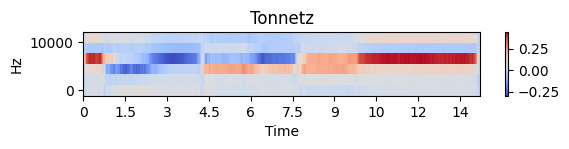

In [37]:
time = np.arange(0, audio_data.shape[0]) / sample_rate

# # Plot the features
# plt.figure(figsize=(12, 8))

# # MFCCs
# plt.plot(4, 4)
# librosa.display.specshow(mfccs, x_axis='time', y_axis='linear')
# plt.colorbar(format='%+2.0f dB')
# plt.title('MFCC')

# Chromagram
# plt.plot(4,4)
# librosa.display.specshow(chroma_cqt, y_axis='linear', x_axis='time')
# plt.colorbar()
# plt.title('Chroma Features with Frequency')
# plt.tight_layout()
# plt.show()

# # Mel Spectrogram
# plt.plot(4,4)
# librosa.display.specshow(mel_spec, x_axis='time', y_axis='linear')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel Spectrogram')

# # Spectral Contrast
# plt.plot(4,4)
# librosa.display.specshow(spectral_contrast, x_axis='time', y_axis='linear')
# plt.colorbar()
# plt.title('Spectral Contrast')

# Tonnetz
plt.subplot(5, 1, 5)
librosa.display.specshow(tonnetz, x_axis='time', y_axis='linear')
plt.colorbar()
plt.title('Tonnetz')

# plt.tight_layout()
# plt.show()
# display()

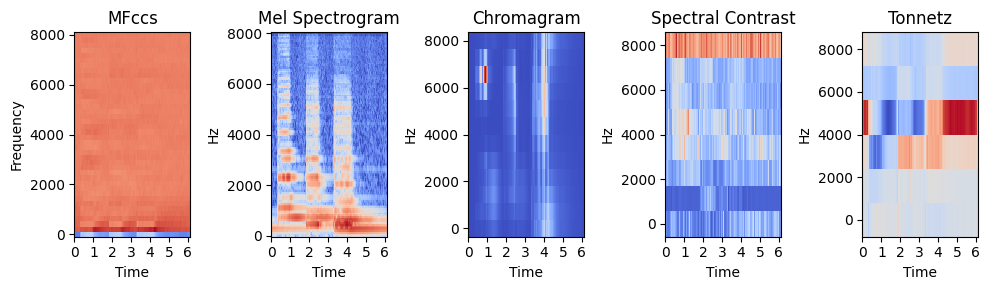

In [89]:
plt.figure(figsize=(10, 3))

# Plotting the Mel Spectrogram
# Plotting the Chromagram
plt.subplot(1, 5, 1)
librosa.display.specshow(mfccs, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='coolwarm')
plt.title('MFccs')
# plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 5, 2)
librosa.display.specshow(log_mel_spec, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='coolwarm')
plt.title('Mel Spectrogram')
# plt.colorbar(format='%+02.0f dB')
# plt.xlabel('Time')
# plt.ylabel('Frequency')

# Plotting the Chromagram
plt.subplot(1, 5, 3)
librosa.display.specshow(chroma, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='coolwarm')
plt.title('Chromagram')
# plt.colorbar()
# plt.xlabel('Time')
# plt.ylabel('Frequency')


# Plotting the Spectral Contrast
plt.subplot(1, 5, 4)
librosa.display.specshow(spectral_contrast, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear' ,cmap='coolwarm')
plt.title('Spectral Contrast')
# plt.colorbar(format='%+02.0f dB')
# plt.xlabel('Time')
# plt.ylabel('Frequency')

# Plotting the Tonnetz
plt.subplot(1, 5, 5)
librosa.display.specshow(tonnetz, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='coolwarm')
plt.title('Tonnetz')
# plt.colorbar()
# plt.xlabel('Time')
# plt.ylabel('Frequency')

plt.tight_layout()
plt.show()